In [1]:
import sympy as smp
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [2]:
class FileSystemManager:
    def __init__(self):
        pass

    def open_file(self, text, filepath, flag):
        """
        Opens a file in read, write, or append mode.
        
        :param text: Text to write to the file if flag is 'w' or 'a'
        :param filepath: Path of the file to open
        :param flag: 'r' to read, 'w' to write, 'a' to append
        :return: File content if reading, None if writing or appending
        """
        try:
            if flag == 'r':
                with open(filepath, 'r') as f:
                    data = f.read()
                    return data  # return instead of print
            elif flag == 'w':
                with open(filepath, 'w') as f:
                    f.write(text)
            elif flag == 'a':
                with open(filepath, 'a') as f:
                    f.write(text)
            else:
                raise ValueError("Unsupported flag. Use 'r' for read, 'w' for write, or 'a' for append.")
        except FileNotFoundError:
            print(f"Error: File {filepath} not found.")
        except IOError as e:
            print(f"Error accessing file {filepath}: {e}")

In [3]:
class MagmaCalculator:
    """
    A class to interact with the Magma Calculator webpage and submit code for evaluation.
    
    Attributes:
    ----------
    output_file : str
        The name of the file where the output from the Magma Calculator will be saved.
    driver : webdriver.Chrome
        A Chrome web driver instance to automate browser interaction.
    url : str
        The URL of the Magma Calculator page.
    
    Methods:
    -------
    submit_code(code):
        Submits the given Magma code to the calculator and saves the result to a file.
    
    close():
        Closes the browser session.
    """
    
    def __init__(self, output_file="MagmaCalcResult"):
        """
        Initializes the MagmaCalculator with the given output file name.
        
        Parameters:
        ----------
        output_file : str, optional
            The name of the file where the result will be saved (default is "output.txt").
        """
        self.url = "http://magma.maths.usyd.edu.au/calc/"
        self.output_file = output_file
        self.file_manager = FileSystemManager()

    def submit_code(self, code):
        """
        Submits the given code to the Magma Calculator and saves the result to the output file.
        
        Parameters:
        ----------
        code : str
            The Magma code to be submitted for evaluation.
        
        Actions:
        -------
        - Opens the Magma Calculator webpage.
        - Finds the input box and enters the code.
        - Clicks the submit button.
        - Waits for the result to load.
        - Retrieves the result and writes it to the specified output file.
        """
        driver = webdriver.Chrome()
        try:
            driver.get(self.url)
            
            input_box = driver.find_element(By.ID, "input")
            input_box.clear()
            input_box.send_keys(code)
            
            submit_button = driver.find_element(By.XPATH, "//input[@value='Submit']")
            submit_button.click()
            
            time.sleep(5)
            
            result_element = driver.find_element(By.ID, "result")
            result_text = result_element.get_attribute('value')
            
            self.file_manager.open_file(code + '\n' + result_text, self.output_file, 'a')
        finally:
            driver.quit()

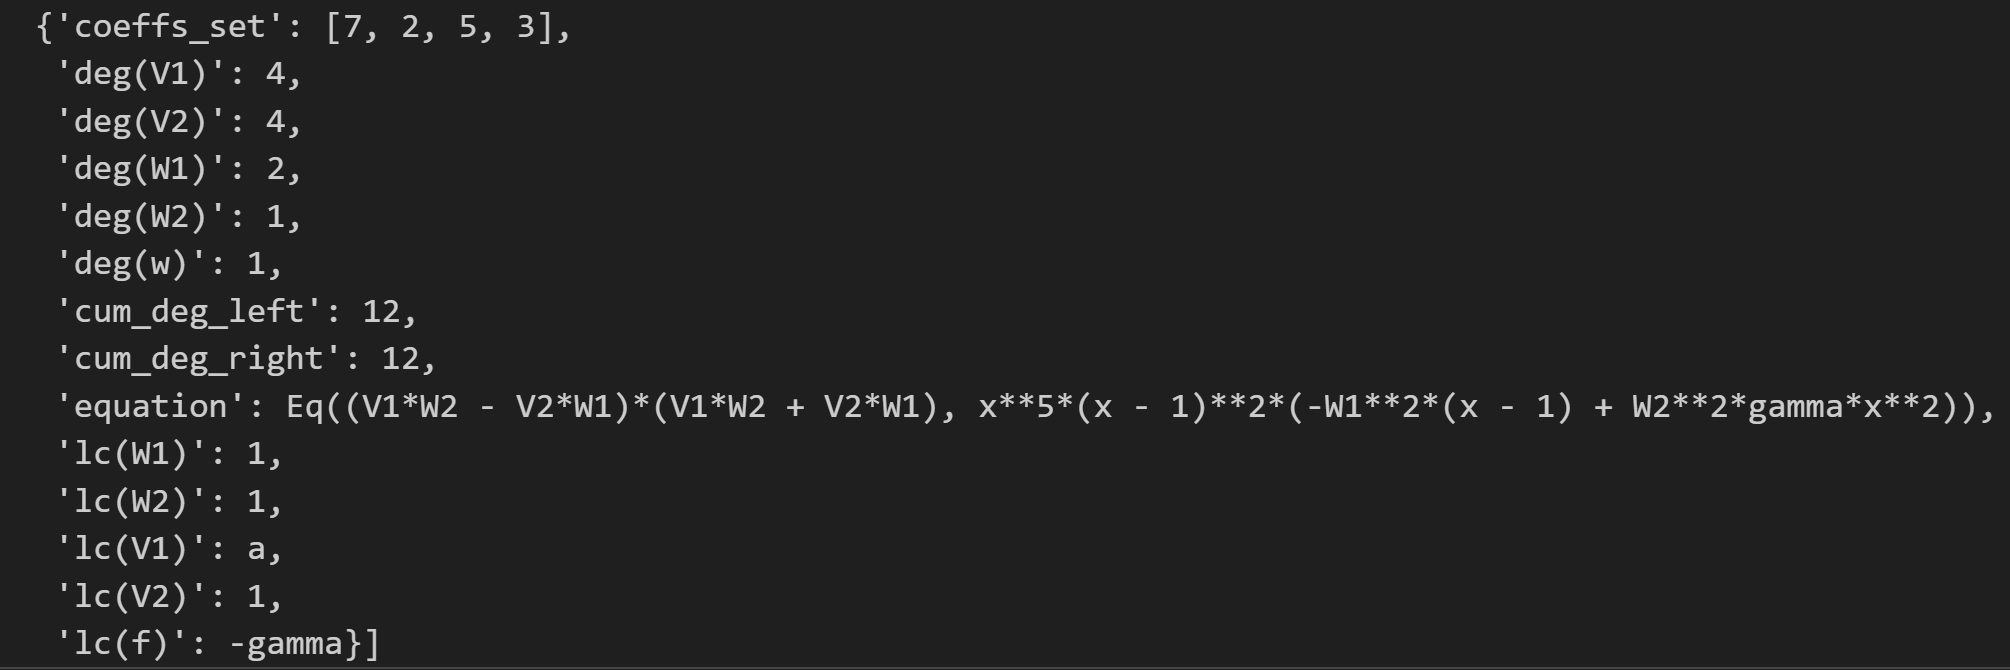
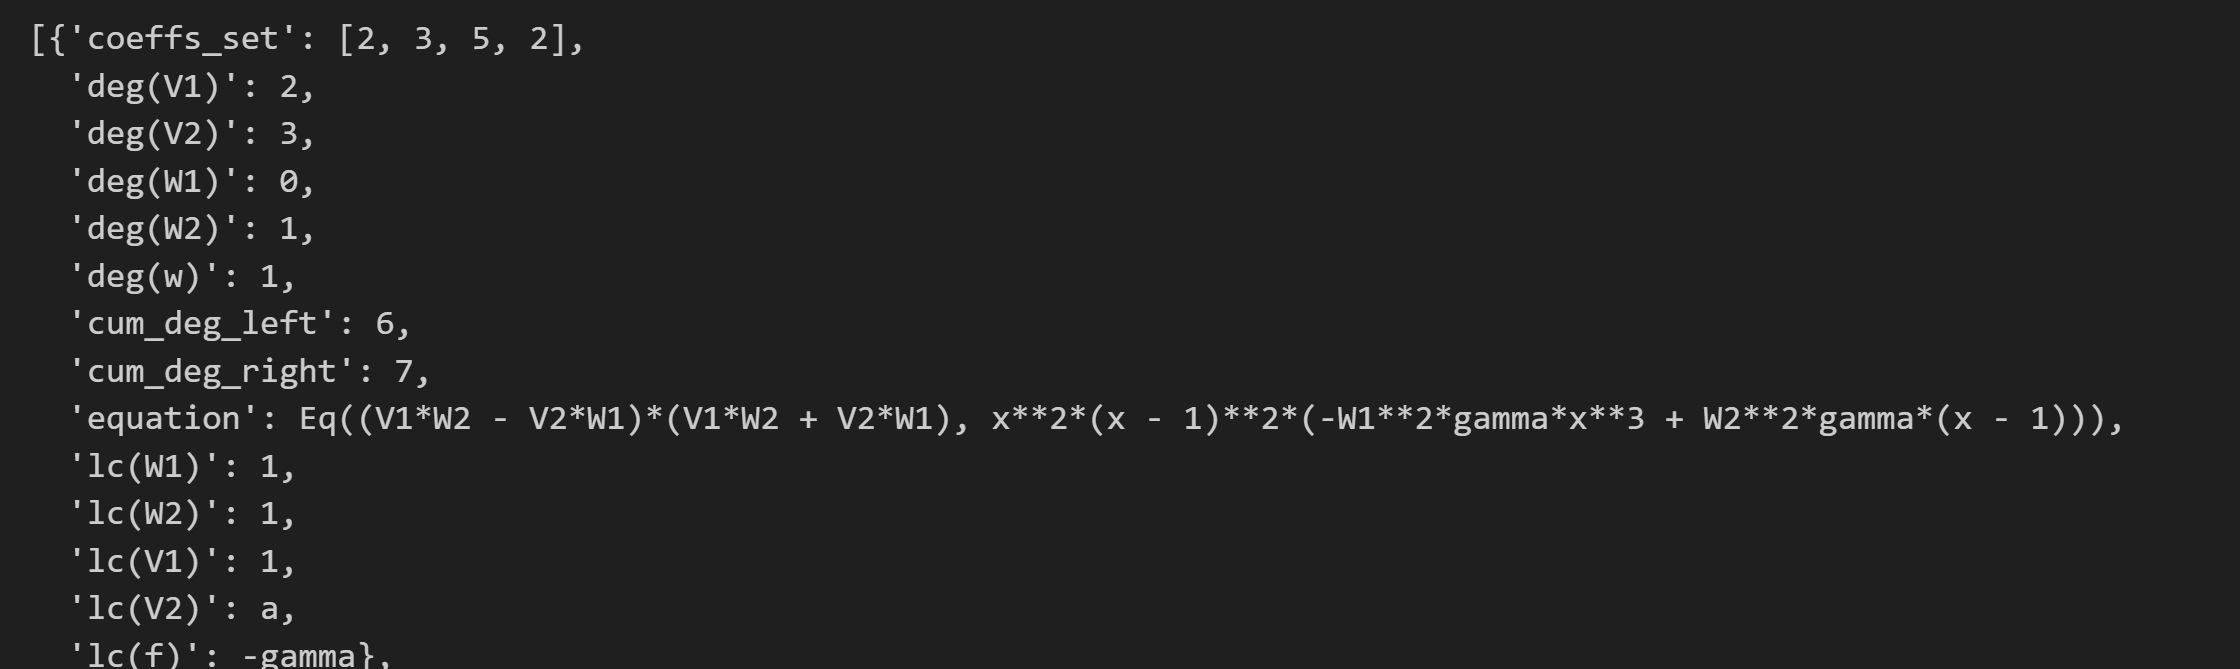

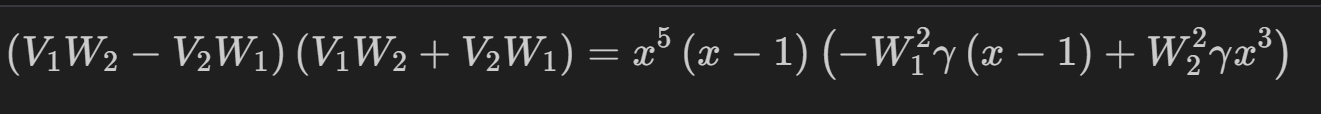

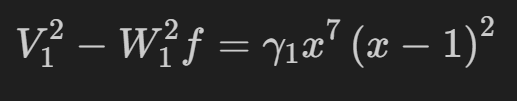
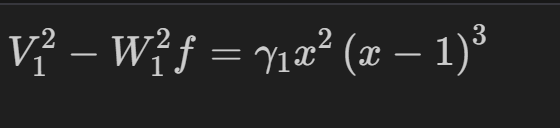
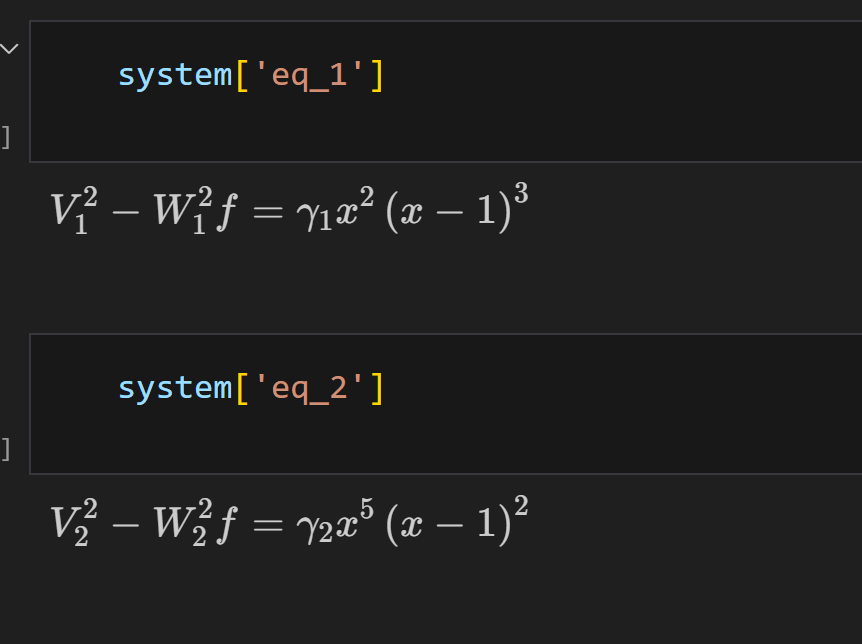

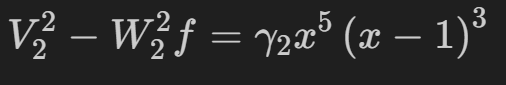
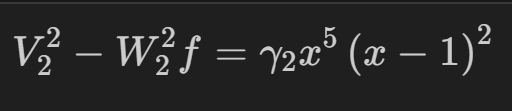

V1 * (x - x0) +- V2 * (x - x1)**2

W1 = (x - x0)**2

W2 = (x - x1)

w = (x - x2)

In [4]:
x, x0, x1, x2, gamma, p, q, t = smp.symbols('x x0 x1 x2 gamma p q t')

In [5]:
eq_1 = smp.Poly((x - x2) * x**5, x)
eq_2 = smp.Poly(gamma*((x - x0)**2*(x - 1)**2 * x**2 - (x - 1)**3 * x**3), x)

In [6]:
eq_1

Poly(x**3 - x1*x**2, x, domain='ZZ[x1]')

In [7]:
eq_2

Poly((-2*gamma*x0 - gamma)*x**4 + (gamma*x0**2 + 6*gamma*x0 + 2*gamma)*x**3 + (-3*gamma*x0**2 - 6*gamma*x0 - gamma)*x**2 + (3*gamma*x0**2 + 2*gamma*x0)*x - gamma*x0**2, x, domain='ZZ[x0,gamma]')

In [8]:
solution_x0 = smp.solve(eq_2.subs(x, x1))
solution_x0 = solution_x0[1][x0]
solution_x0 = solution_x0.subs(smp.sqrt(x1**3 * (x1 - 1)), t / (1 - t**2)**2)
solution_x0 = solution_x0.subs(x1, 1/(1 - t**2))
solution_x0 = smp.simplify(solution_x0)
solution_x0

-1/(t*(t + 1))

In [9]:
eq_1 = eq_1.subs(x1, 1/(1 - t**2))
eq_1

x**3 - x**2/(1 - t**2)

In [10]:
eq_2 = eq_2.subs(x0, solution_x0).simplify()
eq_2 

gamma*(t*x**4*(t + 1)*(-t*(t + 1) + 2) + x*(-2*t*(t + 1) + x**2*(2*t**2*(t + 1)**2 - 6*t*(t + 1) + 1) + x*(-t**2*(t + 1)**2 + 6*t*(t + 1) - 3) + 3) - 1)/(t**2*(t + 1)**2)

In [11]:
def write_div_result(quotient, remainder, path, mode='a'):
    with open(path, mode) as file:
        file.write(f"Quotient: {quotient.as_expr()}\n")
        file.write(f"Remainder: {remainder.as_expr()}\n")
    print(f'Results written to {path}')  

def write_results(f, path, mode='a'):
    with open(path, mode) as file:
        file.write(f"f: {f.as_expr()}\n")
    print(f'Results written to {path}')   

In [12]:
eq_1 = smp.Poly(eq_1, x)
eq_2 = smp.Poly(eq_2, x)

In [13]:
p1 = smp.Poly((x - (1 / (1 - t**2))), x)

eq_2, remainder = smp.div(eq_2, p1)

In [14]:
eq_2 = smp.Poly(eq_2, x)
eq_2.simplify()

Poly((-gamma*t**2 - gamma*t + 2*gamma)/(t**2 + t)*x**3 + (2*gamma*t**3 + 2*gamma*t**2 - 5*gamma*t + gamma)/(t**3 + t**2)*x**2 + (-gamma*t**3 - gamma*t**2 + 4*gamma*t - 2*gamma)/(t**3 + t**2)*x + (-gamma*t + gamma)/(t**3 + t**2), x, domain='ZZ(t,gamma)')

In [15]:
remainder

Poly(0, x, domain='ZZ(t,gamma)')

In [16]:
V1_m = smp.Rational(1,2) * (eq_1 + eq_2)
V2= smp.Rational(1,2) * (-eq_1 + eq_2)

In [17]:
V1_m

Poly((-gamma*t**2 - gamma*t + 2*gamma + t**2 + t)/(2*t**2 + 2*t)*x**3 + (2*gamma*t**4 - 7*gamma*t**2 + 6*gamma*t - gamma + t**2)/(2*t**4 - 2*t**2)*x**2 + (-gamma*t**3 - gamma*t**2 + 4*gamma*t - 2*gamma)/(2*t**3 + 2*t**2)*x + (-gamma*t + gamma)/(2*t**3 + 2*t**2), x, domain='QQ(t,gamma)')

In [18]:
V2

Poly((-gamma*t**2 - gamma*t + 2*gamma - t**2 - t)/(2*t**2 + 2*t)*x**3 + (2*gamma*t**4 - 7*gamma*t**2 + 6*gamma*t - gamma - t**2)/(2*t**4 - 2*t**2)*x**2 + (-gamma*t**3 - gamma*t**2 + 4*gamma*t - 2*gamma)/(2*t**3 + 2*t**2)*x + (-gamma*t + gamma)/(2*t**3 + 2*t**2), x, domain='QQ(t,gamma)')

In [19]:
solution = smp.solve(V1_m.subs(x, solution_x0))
solution_gamma = solution[0][gamma] 
solution_gamma

t*(-t - 1)/(t**6 - 2*t**3 + 1)

In [20]:
V1_mq = (V1_m * V1_m)

In [21]:
V1_mq = smp.Poly(V1_mq.subs(gamma, solution_gamma), x)
V2 = smp.Poly(V2.subs(gamma, solution_gamma), x)

In [22]:
p1 = smp.Poly((x-solution_x0)**2, x)

quotient, remainder = smp.div(V1_mq, p1)
write_div_result(quotient, remainder,'divsion.txt', mode='a')

Results written to divsion.txt


In [23]:
V1_q = quotient

In [24]:
f = smp.Poly(V1_q - solution_gamma*x**2 * (x - 1)**3,x)

In [25]:
f = f.simplify()

In [26]:
def factor_coeffs(f, val):
    return sum(smp.factor(coeff)*val**i for i, coeff in enumerate(reversed(smp.Poly(f, val).all_coeffs())))

In [27]:
f_main = factor_coeffs(f, x)
write_results(f_main,'f.txt',mode='a')

Results written to f.txt


In [28]:
calc = MagmaCalculator()

In [29]:
def check_order(equation):
    """Function that helps to check an order of possible torison points of given function"""
    code = f"""
    P<x> := PolynomialRing(Rationals());
    C1 := HyperellipticCurve({equation});
    J1 := Jacobian(C1);
    TorsionSubgroup(J1);
    ClebschInvariants(C1);
    IgusaClebschInvariants(C1);
    IgusaInvariants(C1);"""
    calc.submit_code(code)

In [30]:
def get_magma_expr(f):
    content, primitive_poly = f.as_content_primitive() 
    integer_poly = primitive_poly * content.denominator  
    integer_poly = smp.Poly(integer_poly, x)
    magma_expr = str(integer_poly.as_expr()).replace('**', '^')
    return magma_expr

In [35]:
def curve_search(parameters_set):
    for value in parameters_set:
        f = f_main.subs(t,value)
        magma_expr = get_magma_expr(f)
        check_order(magma_expr)

In [36]:
curve_search(range(2,10))

Exception ignored in: <function Service.__del__ at 0x00000227EBC77240>
Traceback (most recent call last):
  File "c:\Users\Mirom\Desktop\NIR\NIR\.venv\Lib\site-packages\selenium\webdriver\common\service.py", line 192, in __del__
    self.stop()
  File "c:\Users\Mirom\Desktop\NIR\NIR\.venv\Lib\site-packages\selenium\webdriver\common\service.py", line 149, in stop
    self.send_remote_shutdown_command()
  File "c:\Users\Mirom\Desktop\NIR\NIR\.venv\Lib\site-packages\selenium\webdriver\common\service.py", line 129, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "C:\Users\Mirom\AppData\Local\Programs\Python\Python312\Lib\urllib\request.py", line 215, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mirom\AppData\Local\Programs\Python\Python312\Lib\urllib\request.py", line 515, in open
    response = self._open(req, data)
               ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mirom\App

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=131.0.6778.205)
Stacktrace:
	GetHandleVerifier [0x00007FF714FAFB05+28789]
	(No symbol) [0x00007FF714F186E0]
	(No symbol) [0x00007FF714DB592A]
	(No symbol) [0x00007FF714D8F505]
	(No symbol) [0x00007FF714E36477]
	(No symbol) [0x00007FF714E4EF42]
	(No symbol) [0x00007FF714E2F1E3]
	(No symbol) [0x00007FF714DFA938]
	(No symbol) [0x00007FF714DFBAA1]
	GetHandleVerifier [0x00007FF7152E933D+3410093]
	GetHandleVerifier [0x00007FF7152FE7DD+3497293]
	GetHandleVerifier [0x00007FF7152F2A73+3448803]
	GetHandleVerifier [0x00007FF715077BBB+848171]
	(No symbol) [0x00007FF714F23C3F]
	(No symbol) [0x00007FF714F1F6E4]
	(No symbol) [0x00007FF714F1F87D]
	(No symbol) [0x00007FF714F0ED49]
	BaseThreadInitThunk [0x00007FFB2EC9E8D7+23]
	RtlUserThreadStart [0x00007FFB30B9FBCC+44]
